In [64]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.preprocessing import LabelEncoder 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, log_loss
from sklearn.naive_bayes import MultinomialNB,GaussianNB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from collections import Counter
import math

In [65]:
df_train = pd.read_csv("train.csv",header=0)
df_test = pd.read_csv("test.csv",header=0)

# Create feature vectors for each article based on term frequency
vectorizer = TfidfVectorizer()
vectorizer.fit(df_train.Text)
x_train = vectorizer.fit_transform(df_train.Text).toarray()

# Encode the labels
le = LabelEncoder()
le.fit(['entertainment', 'tech'])
y_train = le.transform(df_train.Category.to_numpy())

# Counts Vect
vect1 = CountVectorizer()
vect2= vect1.fit_transform(df_train['Text'])
features = vect1.get_feature_names_out()

print("Number of Articles: ", df_train.shape[0])
print("Number of Features: ", len(features))
print()

# Displaying as Data Frame
count_vect_df = pd.DataFrame(x_train, columns=vectorizer.get_feature_names_out())
count_vect_df.head()

Number of Articles:  428
Number of Features:  13518



,00,000,000th,001st,0051,007,0100,0130,028,05,...,zola,zombie,zombies,zone,zonealarm,zones,zoom,zooms,zooropa,zorro
0,0.0,0.020115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054551,0.0


### Data Exploration

In [66]:
# getting the counts of all the words
def word_counts(data): 
    vect1 = CountVectorizer()
    vect2= vect1.fit_transform(data['Text'])
    features = vect1.get_feature_names_out()
    counts = vect2.sum(axis=0).A1
    feat_counts = list(zip(list(features),counts))
    feat_counts = sorted(feat_counts, key=lambda x:x[1],reverse=True)
    return feat_counts[:50]
    
whole = word_counts(df_train)
tech = word_counts(df_train[df_train['Category']=='tech'])
entertainment = word_counts(df_train[df_train['Category']=='entertainment'])

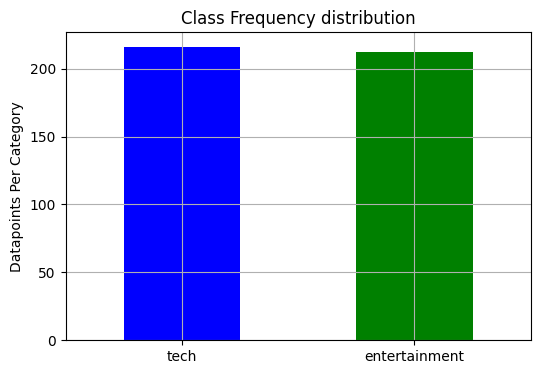

In [67]:
catorgy_counts =  df_train['Category'].value_counts()  
plt.figure(figsize=(6,4))
my_colors = ['b','g']
catorgy_counts.plot(kind='bar', color=my_colors)
plt.grid()
plt.xticks(rotation ='horizontal')
plt.ylabel("Datapoints Per Category")
plt.title("Class Frequency distribution")
plt.show()

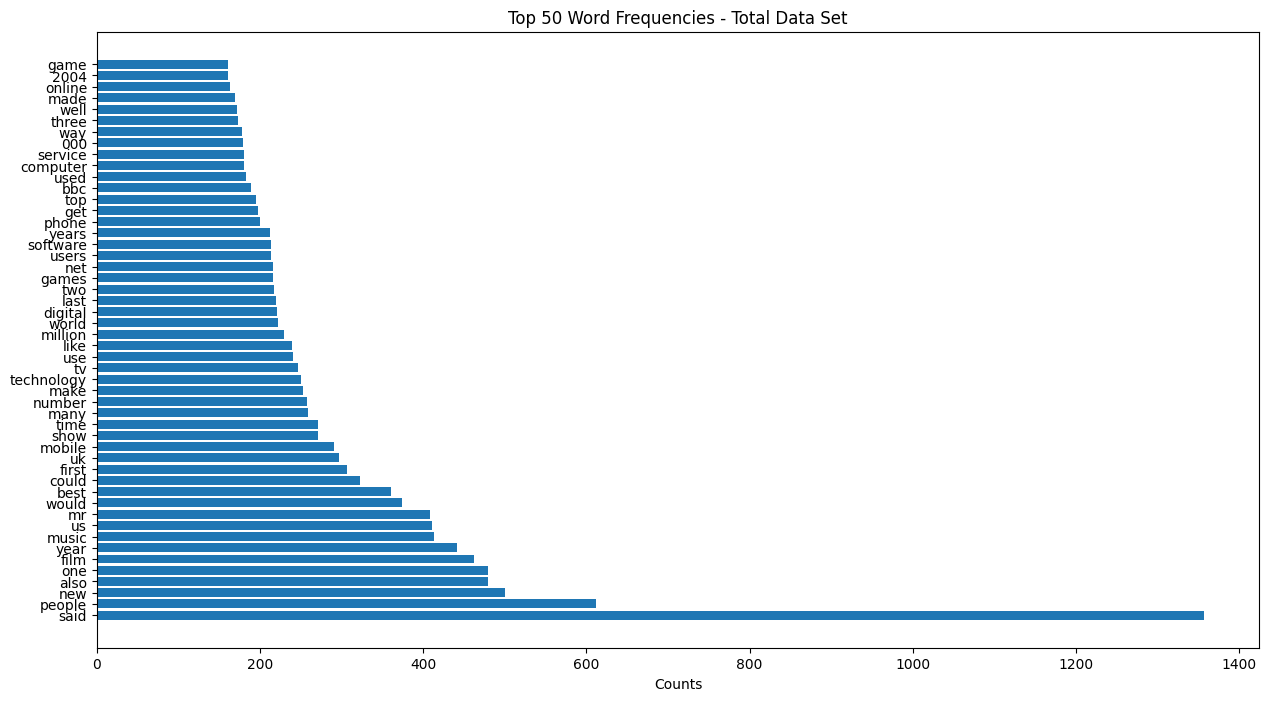

In [68]:
# showing the top 50 word frequency for all articles
x = [x[0] for x in whole]
y = [x[1] for x in whole]
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
plt.yticks(fontsize=10)
ax.barh(x,y, align='center')
ax.set_xlabel('Counts')
ax.set_title('Top 50 Word Frequencies - Total Data Set')
plt.show()

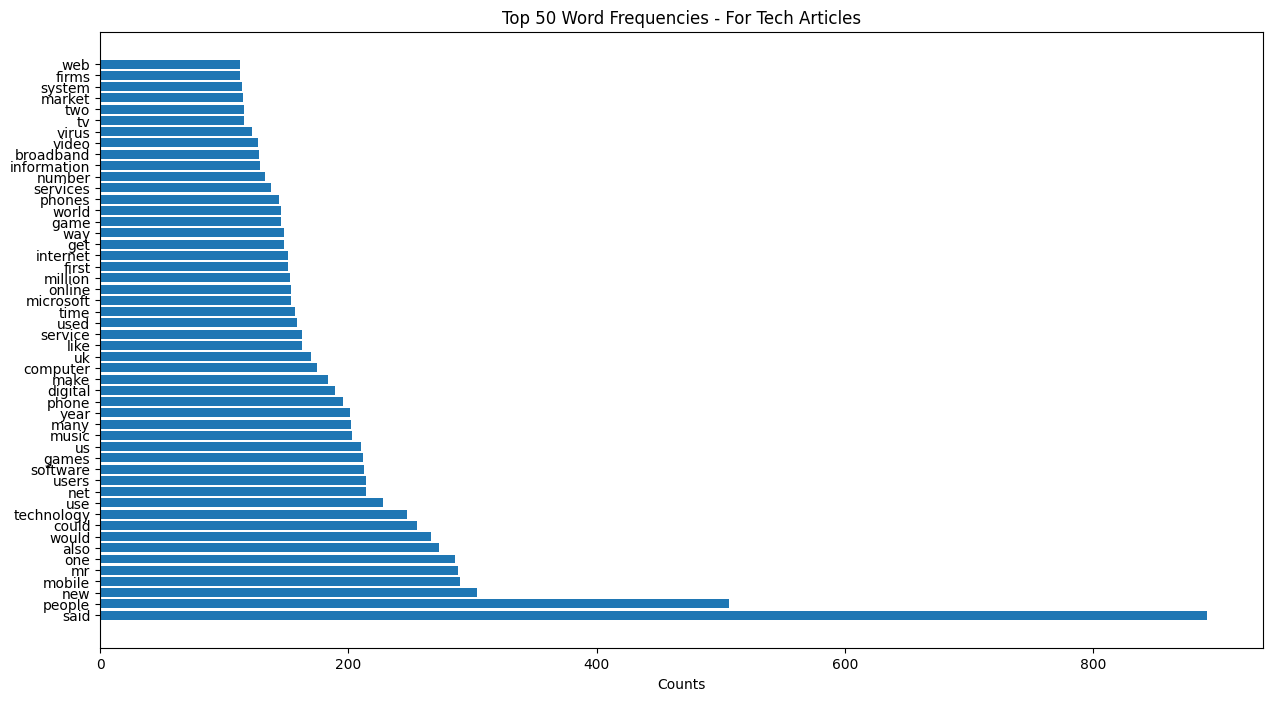

In [69]:
# showing the top 50 word frequency for TECH articles
x = [x[0] for x in tech]
y = [x[1] for x in tech]
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
plt.yticks(fontsize=10)
ax.barh(x, y, align='center')
ax.set_xlabel('Counts')
ax.set_title('Top 50 Word Frequencies - For Tech Articles')
plt.show()

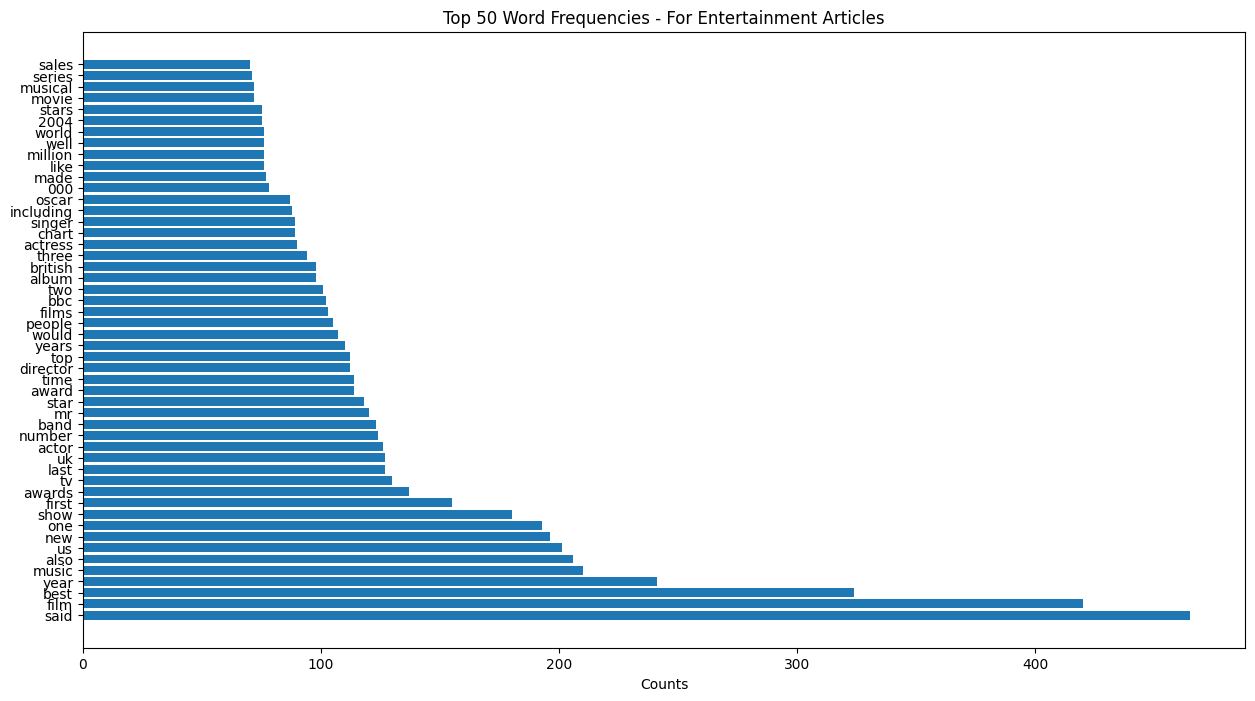

In [70]:
# showing the top 50 word frequency for ENTERTAINMENT articles
x = [x[0] for x in entertainment]
y = [x[1] for x in entertainment]
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
plt.yticks(fontsize=10)
ax.barh(x, y, align='center')
ax.set_xlabel('Counts')
ax.set_title('Top 50 Word Frequencies - For Entertainment Articles')
plt.show()

## Logistic Regression Classifier

In [19]:
regularisation_values = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
loss = []

logregVectorizer = CountVectorizer()
logregVectorizer.fit(df_train.Text)
x_train = logregVectorizer.fit_transform(df_train.Text).toarray()
le = LabelEncoder()
le.fit(['entertainment', 'tech'])
y_train = le.transform(df_train.Category.to_numpy())
x_test = logregVectorizer.transform(df_test.Text).toarray()
y_test = le.transform(df_test.Category.to_numpy())

for i in range(len(regularisation_values)):

  # C = Inverse of regularization strength, smaller values specify stronger regularization.
  logreg = LogisticRegression(penalty = 'l2', C = regularisation_values[i]) 
  logreg.fit(x_train, y_train)
  y_pred = logreg.predict(x_test)
  logloss = log_loss(y_train, logreg.predict_proba(x_train))
  loss.append(logloss)

  print("C =", regularisation_values[i])
  print("Training Accuracy:",logreg.score(x_train, y_train))
  print("Testing Accuracy:", logreg.score(x_test, y_test))
  print("Training Loss:", logloss)
  print("--------------------------------------")

C = 1000
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Loss: 6.834171528290429e-06
--------------------------------------
C = 100
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Loss: 5.567963625685187e-05
--------------------------------------
C = 10
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Loss: 0.0004278016453305472
--------------------------------------
C = 1
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Loss: 0.0030562071979676987
--------------------------------------
C = 0.1
Training Accuracy: 1.0
Testing Accuracy: 1.0
Training Loss: 0.019372762965926528
--------------------------------------
C = 0.01
Training Accuracy: 0.9976635514018691
Testing Accuracy: 0.9905660377358491
Training Loss: 0.09777194153442258
--------------------------------------
C = 0.001
Training Accuracy: 0.9766355140186916
Testing Accuracy: 0.9811320754716981
Training Loss: 0.31594799623539876
--------------------------------------


Text(0, 0.5, 'Training Loss')

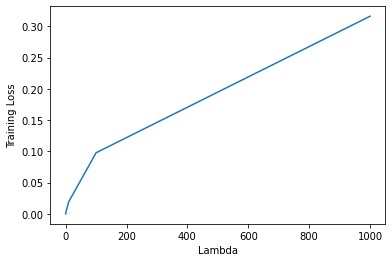

In [20]:
# Convert C values into lambda values.
for i in range(len(regularisation_values)):
  regularisation_values[i] = 1/regularisation_values[i]

plt.plot(regularisation_values, loss)
plt.xlabel('Lambda')
plt.ylabel('Training Loss')

### Naive Bayes Classifier

In [21]:
# Identifying unique words traning data (Bag of Words)
vectorizer1 = CountVectorizer()
vectorizer1.fit(df_train.Text)

# Vectorizing articles 
x_train = vectorizer1.fit_transform(df_train.Text).toarray()
x_test = vectorizer1.transform(df_test.Text).toarray()

# Encoding class labels
le = LabelEncoder()
le.fit(['entertainment', 'tech'])
y_train = le.transform(df_train.Category.to_numpy())
y_test = le.transform(df_test.Category.to_numpy())

# Fitting and evaluating Multinomail NB
mb_model = MultinomialNB()
mb_model.fit(x_train,y_train)
print("Training Accuracy: ",mb_model.score(x_train,y_train))
print("Testing Accuracy: ",mb_model.score(x_test,y_test))

Training Accuracy:  0.9953271028037384
Testing Accuracy:  0.9716981132075472


In [22]:
# getting most identifiable words dict for each class  
def get_salient_words(mb_clf, vect, class_ind):
    words = vect.get_feature_names_out()
    zipped = list(zip(words, np.exp(mb_clf.feature_log_prob_[class_ind])))
    sorted_zip = sorted(zipped, key=lambda t: t[1], reverse=True)
    return sorted_zip

# Top 20 salient words for each class 
entertainment_salient_top_20 = get_salient_words(mb_model, vectorizer1, 0)[:20]
tech_salient_top_20 = get_salient_words(mb_model, vectorizer1, 1)[:20]

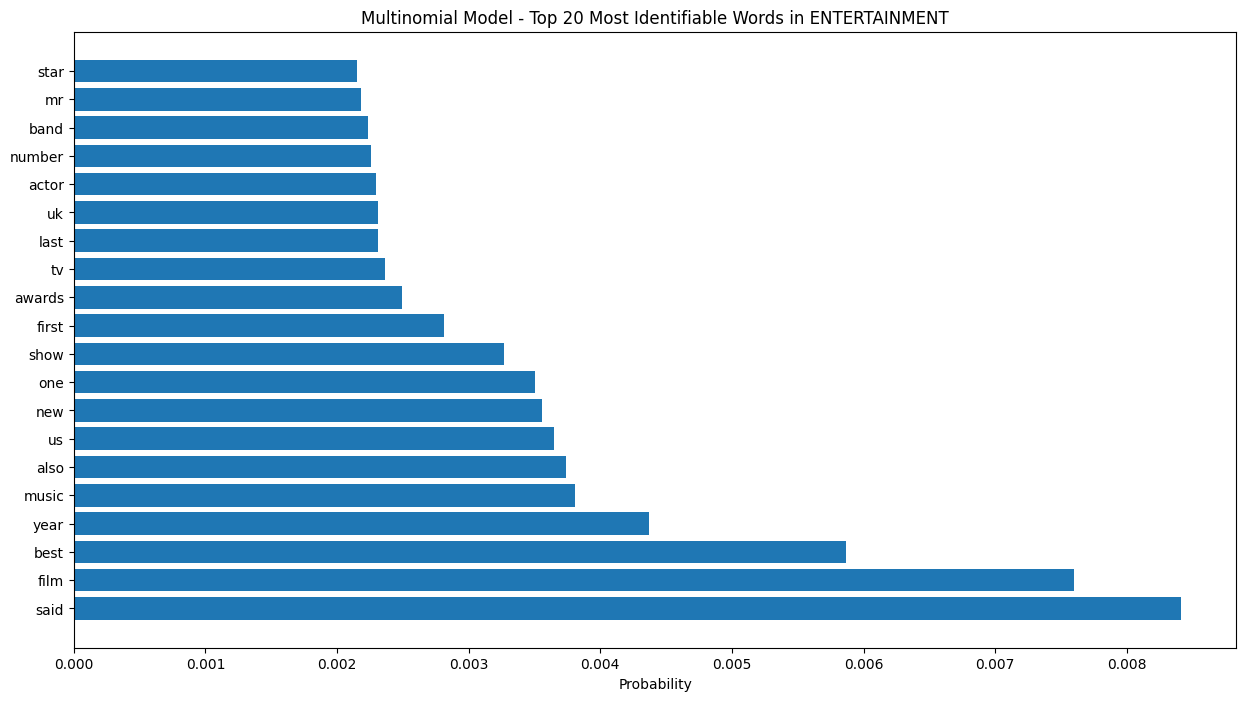

In [23]:
# top 20 words for ENTERTAINMENT using MB model
x = [x[0] for x in entertainment_salient_top_20]
y = [x[1] for x in entertainment_salient_top_20]
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
plt.yticks(fontsize=10)
ax.barh(x,y, align='center')
ax.set_xlabel('Probability')
ax.set_title('Multinomial Model - Top 20 Most Identifiable Words in ENTERTAINMENT')
plt.show()

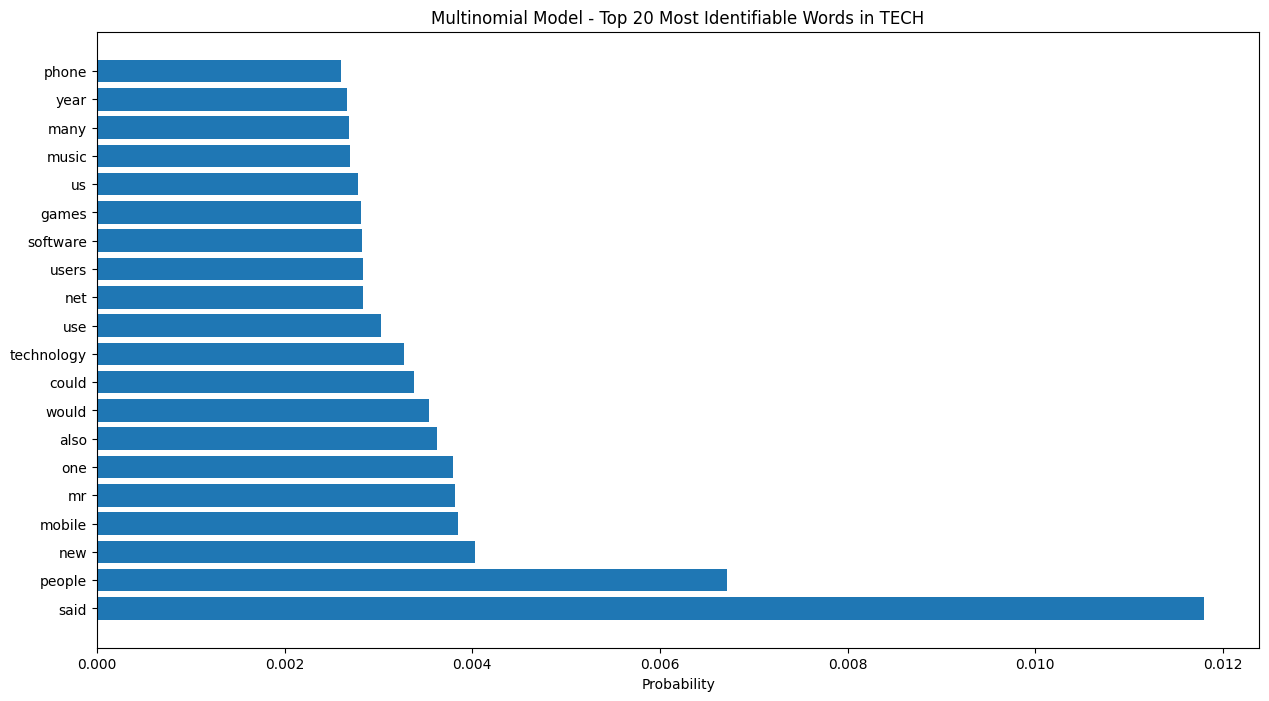

In [24]:
# top 20 words for TECH using MB model
x = [x[0] for x in tech_salient_top_20]
y = [x[1] for x in tech_salient_top_20]
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
plt.yticks(fontsize=10)
ax.barh(x,y, align='center')
ax.set_xlabel('Probability')
ax.set_title('Multinomial Model - Top 20 Most Identifiable Words in TECH')
plt.show()

In [25]:
# Top 20 most identifiable words using constrastive conditional probability

# Get vocab dicts for whole data set, tech and entertainment
def features(data): 
    vect1 = CountVectorizer()
    vect2= vect1.fit_transform(data['Text'])
    feature_names = vect1.get_feature_names_out()
    counts = vect2.sum(axis=0).A1
    feat_counts = dict(zip(list(feature_names),counts))
    return feat_counts

# Vocab dicts
whole = features(df_train)
tech = features(df_train[df_train['Category']=='tech'])
entertainment = features(df_train[df_train['Category']=='entertainment'])

In [29]:
# Initializing probability Dicts for each class 
tech_prob = {}
entertainment_prob = {}
k = []

# Deleting words that are not present in both classes
for key in whole.keys():
  if key not in tech.keys() or key not in entertainment.keys():
    k.append(key)

for key in k:
  del whole[key]

# Applying constrastive conditional probability
for key in whole.keys():
  prob_tech = tech[key]/entertainment[key]
  prob_entertainment = entertainment[key]/tech[key]
  tech_prob[key] = prob_tech
  entertainment_prob[key] = prob_entertainment

# Filtering for top 20 probabilities in entertainment
t = Counter(tech_prob)
t_20 = t.most_common(20)

# Formating for plotting 
t_words = [x[0] for x in t_20]
t_probs = [x[1] for x in t_20]

# Filtering for top 20 probabilities in entertainment
e = Counter(entertainment_prob) 
e_20  = e.most_common(20)

# Formating for plotting
e_words = [x[0] for x in e_20]
e_probs = [x[1] for x in e_20]

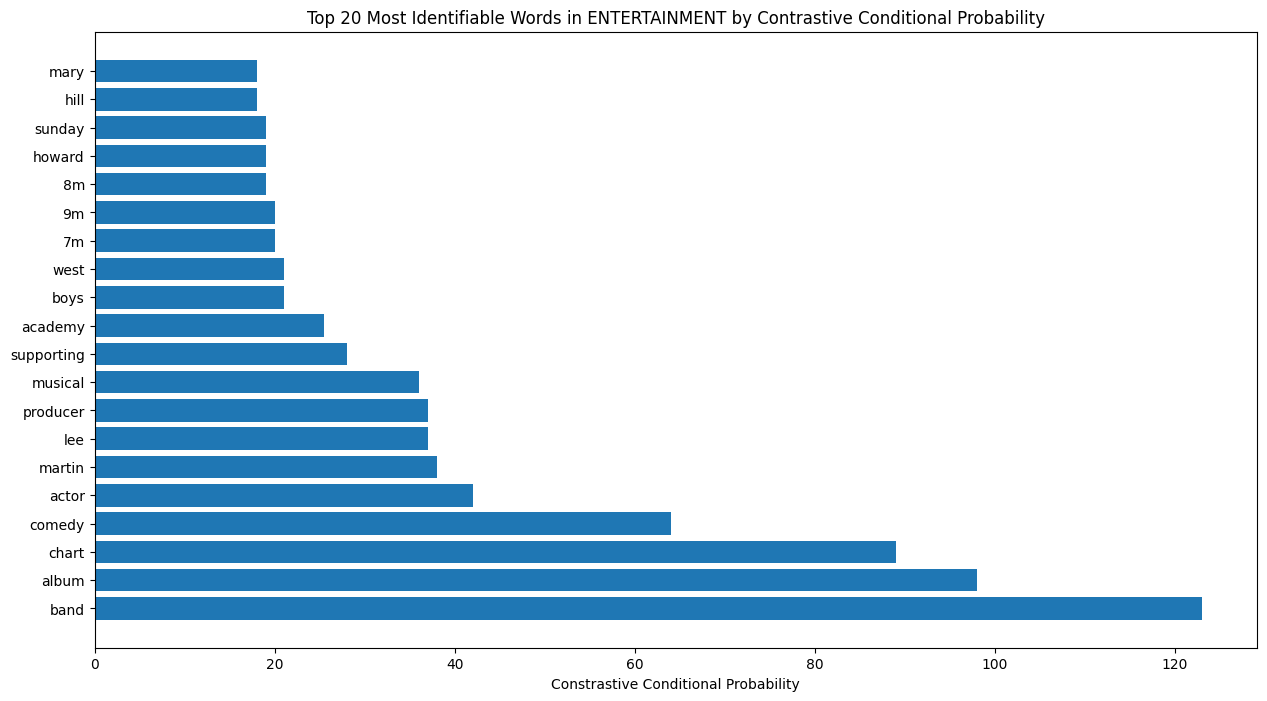

In [30]:
# top 20 words for ENTERTAINMENT using equation from the question
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
plt.yticks(fontsize=10)
ax.barh(e_words,e_probs, align='center')
ax.set_xlabel('Constrastive Conditional Probability')
ax.set_title('Top 20 Most Identifiable Words in ENTERTAINMENT by Contrastive Conditional Probability')
plt.show()

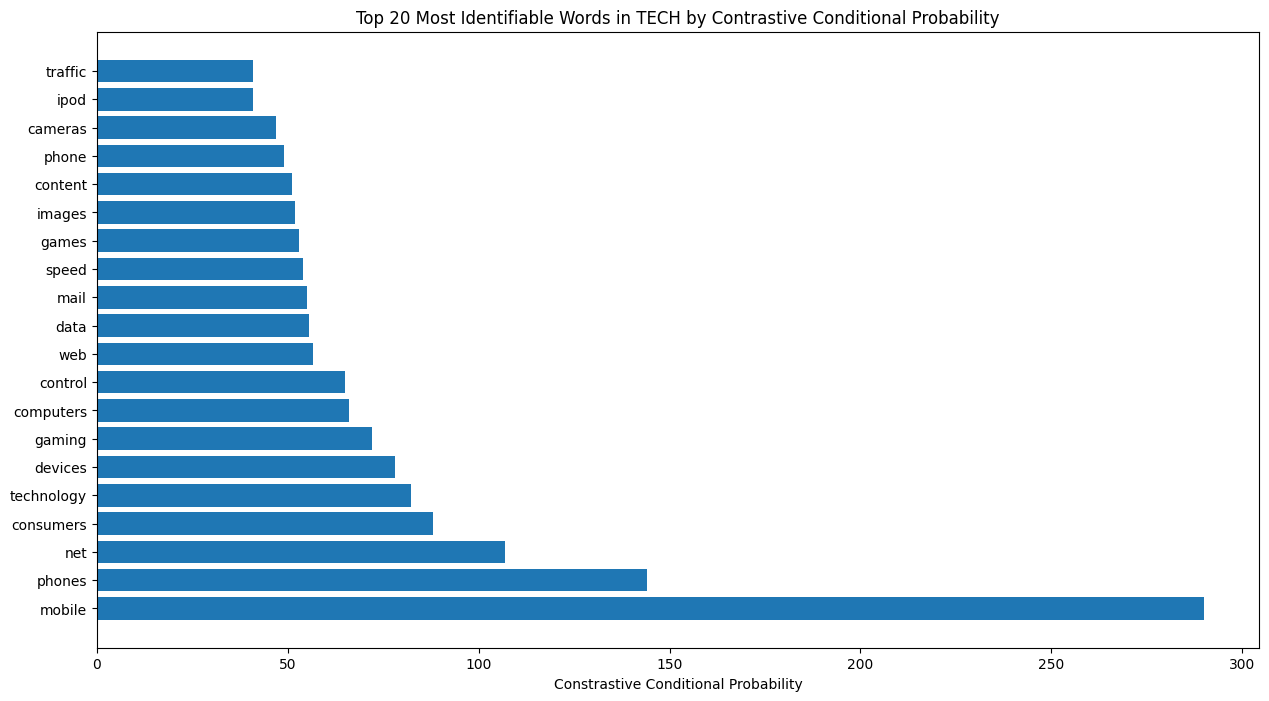

In [31]:
# top 20 words for TECH using equation from the question
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(15, 8))
plt.yticks(fontsize=10)
ax.barh(t_words,t_probs, align='center')
ax.set_xlabel('Constrastive Conditional Probability')
ax.set_title('Top 20 Most Identifiable Words in TECH by Contrastive Conditional Probability')
plt.show()

We have found the top 20 words for each class using two different methods:
1.   The Naive Bayes Classifier
2.   Equation: $\frac{P(X_w=1|Y=1)}{P(X_w=1|Y\neq1)}$

We see that the distribution of both entertainment and tech for their respective methods both have a similar distribution. However, when comparing the distribution between methods, we see that the words from the equation method have a slightly more skewed distribution where the most identifiable words are significantly more distinct than the most identifiable words from the Naive Bayes classifier. This suggests that it would be more suitable to determine the class of an article using a more refined set of words, rather than the entire word list across all articles.\
\
We also see that _said_ is the most common word found in articles from both classes using the Naive Bayes classifier. Due to the Naive Bayes method of prediction, it may not be suitable to determine article class as there are many words which are present in all classes. Therefore, the second list using the equation would describe the two classes better.

### Support Vector Machine Classifier

In [32]:
# Function to plot decision surface, boundary and margins
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # plot the decision surface
    colors = ('red', 'purple')
    cmap = ListedColormap(colors)
    x1_min, x1_max = xlim[0] - 1, xlim[1] + 1
    x2_min, x2_max = ylim[0] - 1, ylim[1] + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)    
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # # plot support vectors
    # if plot_support:
    #     ax.scatter(model.support_vectors_[:, 0],
    #                model.support_vectors_[:, 1],
    #                s=300, linewidth=1, edgecolor='black', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [33]:
# Create feature vectors for each article based on term frequency
vectorizer = TfidfVectorizer()
vectorizer.fit(df_train.Text)
x_train = vectorizer.fit_transform(df_train.Text).toarray()

# Encode the labels
le = LabelEncoder()
le.fit(['entertainment', 'tech'])
y_train = le.transform(df_train.Category.to_numpy())

# Reduce n-features to 2 for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(x_train)

df = pd.DataFrame(reduced, columns=['feature1', 'feature2'])
df['label'] = y_train

#### Soft-Margin Linear SVM

In [71]:
# See how C affects train and test accuracy
cValues = [0.1, 0.5, 1, 10]
x_test = vectorizer.transform(df_test.Text).toarray()
y_test = le.transform(df_test.Category.to_numpy())
for i in cValues:
    svmSoft = SVC(kernel='linear', C=i)
    svmSoft.fit(x_train, y_train)
    y_pred = svmSoft.predict(x_test)
    print("C =", i)
    print("Training Set Score:", svmSoft.score(x_train,y_train))
    print("Test Set Score:", accuracy_score(y_test,y_pred))
    print("-----------------------------------------------")

C = 0.1
Training Set Score: 0.9929906542056075
Test Set Score: 0.9716981132075472

-----------------------------------------------
C = 0.5
Training Set Score: 0.9976635514018691
Test Set Score: 1.0

-----------------------------------------------
C = 1
Training Set Score: 0.9976635514018691
Test Set Score: 0.9811320754716981

-----------------------------------------------
C = 10
Training Set Score: 1.0
Test Set Score: 0.9811320754716981

-----------------------------------------------


From evaluting the training and test scores, we have chosen to have the hyperparameter C = 0.5 as this has the highest test score while also retaining a high training set score.

c:\Users\GGPC\anaconda3\envs\361GroupProject\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\GGPC\anaconda3\envs\361GroupProject\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


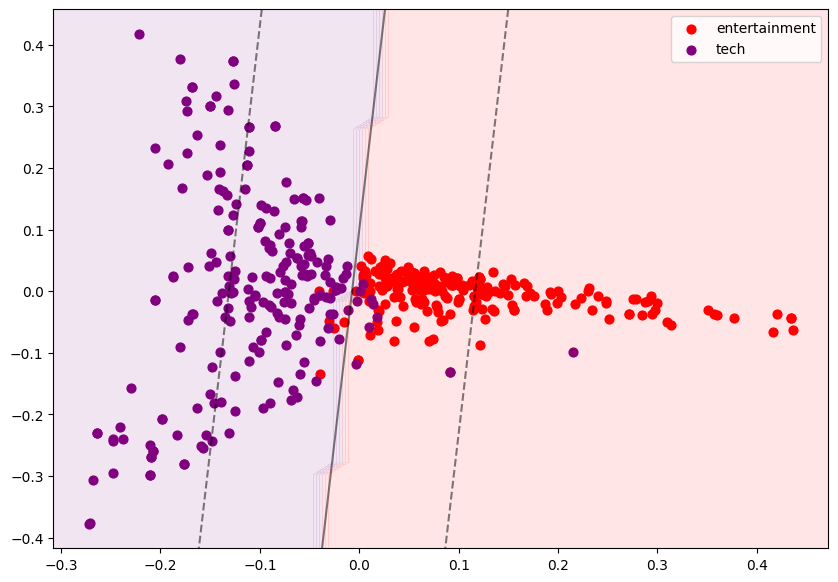

In [72]:
# Plot Soft-Margin Linear SVM model
svmSoft = SVC(kernel='linear', C=0.5)
svmSoft.fit(df[['feature1', 'feature2']], df['label'])

plt.figure(figsize=(10,7))
plt.scatter(df[df['label'] == 0]['feature1'], df[df['label'] == 0]['feature2'], c='red', s=40, label='entertainment')
plt.scatter(df[df['label'] == 1]['feature1'], df[df['label'] == 1]['feature2'], c='purple', s=40, label='tech')
plt.legend()

plot_svc_decision_function(svmSoft)

#### Hard-Margin RBF SVM

In [73]:
# See how gamma affects train and test accuracy
gammaValues = [0.1, 1, 5, 10]
for i in gammaValues:
    svmHard = SVC(kernel='rbf', gamma=i, C=1E10)
    svmHard.fit(x_train, y_train)
    y_pred = svmHard.predict(x_test)
    print()
    print("Gamma:", i)
    print("Training Set Score:", svmHard.score(x_train,y_train))
    print("Test Set Score:", accuracy_score(y_test,y_pred))


Gamma: 0.1
Training Set Score: 1.0
Test Set Score: 0.9811320754716981

Gamma: 1
Training Set Score: 1.0
Test Set Score: 0.9905660377358491

Gamma: 5
Training Set Score: 1.0
Test Set Score: 0.6981132075471698

Gamma: 10
Training Set Score: 1.0
Test Set Score: 0.6698113207547169


From evaluating the training and test scores, we have chosen to have the hyperparamter  σ  = 1 as this provides the highest test score while also having 100% accuracy on the training set.

c:\Users\GGPC\anaconda3\envs\361GroupProject\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\GGPC\anaconda3\envs\361GroupProject\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


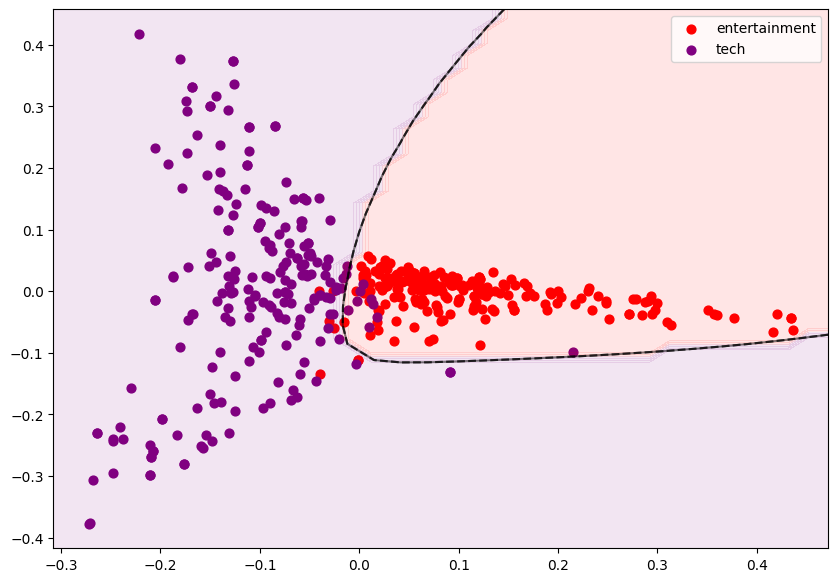

In [74]:
# Plot Hard-Margin RBF kernel SVM model
svmHard = SVC(kernel='rbf', gamma=1, C=1E10)
svmHard.fit(df[['feature1', 'feature2']], df['label'])

plt.figure(figsize=(10,7))
plt.scatter(df[df['label'] == 0]['feature1'], df[df['label'] == 0]['feature2'], c='red', s=40, label='entertainment')
plt.scatter(df[df['label'] == 1]['feature1'], df[df['label'] == 1]['feature2'], c='purple', s=40, label='tech')
plt.legend()

plot_svc_decision_function(svmHard)

The lower C is, the higher the tolerance for misclassification which leads to a lower training accuracy and wider decision boundaries, whereas the higher C is, the lower the tolerance for misclassification leading to a higher training accuracy and smaller decision boundaries.

The lower  σ  is, the simpler the model is leading to more linear decision boundaries, whereas the higher  σ  is, the more complex the model is leading to more non-linear decision boundaries.

### Nerual Network Classifier

c:\Users\GGPC\anaconda3\envs\361GroupProject\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


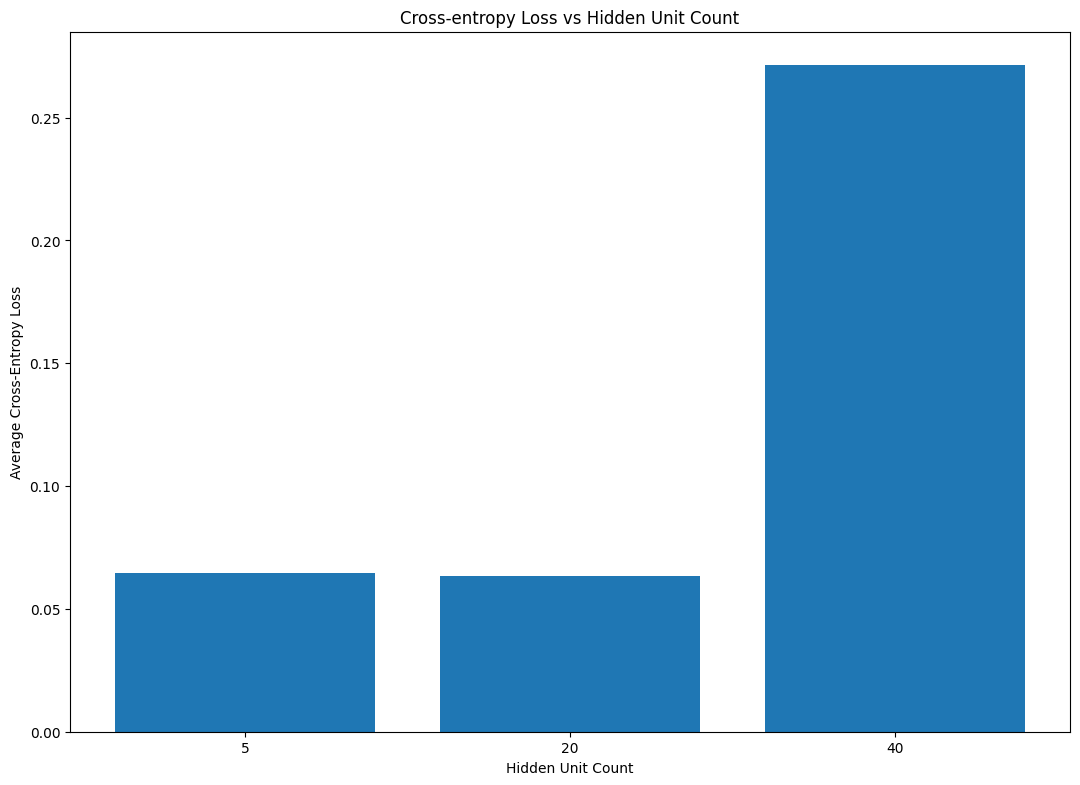

In [75]:
# 5 hidden units
cf5 = MLPClassifier(hidden_layer_sizes=(5), max_iter=100, learning_rate_init=0.01)
cf5.fit(x_train, y_train)
avg_5 = sum(cf5.loss_curve_)/len(cf5.loss_curve_)

# 20 hidden units
cf20 = MLPClassifier(hidden_layer_sizes=(20), max_iter=100, learning_rate_init=0.01)
cf20.fit(x_train, y_train)
avg_20 = sum(cf20.loss_curve_)/len(cf20.loss_curve_)

# 40 hidden units
cf40 = MLPClassifier(hidden_layer_sizes=(40), max_iter=100, learning_rate_init=0.01)
cf40.fit(x_train, y_train)
avg_40 = sum(cf40.loss_curve_)/len(cf40.loss_curve_)

loss_values =[avg_5, avg_20, avg_40]
unit_values =["5", "20", "40"]

fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
ax.bar(unit_values,loss_values)
ax.set_title("Cross-entropy Loss vs Hidden Unit Count")
ax.set_ylabel('Average Cross-Entropy Loss')
ax.set_xlabel('Hidden Unit Count')
plt.show()

Increasing the number of hidden units increases the ability of the model to approximate a continuous function (via non-linear regression). As such, a higher unit count should result in lower average loss as the model better represents the data. This provides diminishing returns over time as increasing the count will eventually result in overfitting and thus loss of accuracy.

We can see here that increasing hidden unit count to 20 actually causes a small increase in loss, which is then followed by a sharp drop at 40 hidden units. This change at 20 is more likely the result of uncertainty than anything else, a the increase is very minor and the trend is correctly represented once the loss drops again at 40.

### Classification Quality Evaluation

We will now explore how the size of the training data affects the train and test accuracy. We will train each classifier on each of the folling values as proportion of the training examples: [0.1, 0.3, 0.5, 0.7, 0.9] (that is, use the data given by XTrain[0:mN] and yTrain[0:mN]). To evaluate our findings, we will compare the training and testing accuracy for each proportion using their classification accuracy in F1 measure, as shown below.

$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$

##### Utility Functions

In [45]:
def training_set_generator(train,test):
    length = train.shape[0]
    modifiers = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    x_train = np.array(train.Text)
    y_train = np.array(train.Category)
    x_test = np.array(test.Text)
    y_test = np.array(test.Category)
    return [[x_train[:round(x * length)],y_train[:round(x * length)],x_test,y_test] for x in modifiers]  # == runs

def tf_idf_generator(runs): # [Runs = x,y train and x,y test] for each training size
    min_word_occurrence = 1 
    final = []
    for run in runs:
        vect = TfidfVectorizer(min_df=min_word_occurrence)
        final.append([vect.fit_transform(run[0]),run[1],vect.transform(run[2]),run[3]])
    return final

def modelRun(runs, model):
    train_scores = []
    test_scores = []
    for i in range(len(runs)):
        run = runs[i]
        x_train,y_train,x_test,y_test = run[0],run[1],run[2],run[3]
        model.fit(x_train,y_train)
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        train_scores.append(f1_score(y_train,y_pred_train,pos_label="tech"))
        test_scores.append(f1_score(y_test,y_pred_test,pos_label="tech"))
    return [train_scores,test_scores]
  

In [46]:
# Training sets
training_sets = training_set_generator(df_train,df_test)
tf_idf = tf_idf_generator(training_sets)

#### LR Runs

In [47]:
lrModel = LogisticRegression(penalty="l2", C=1)
lr_test = modelRun(tf_idf, lrModel)
train_scores_lr,test_scores_lr = lr_test[0], lr_test[1]

#### NB Runs

In [48]:
mb_model = MultinomialNB()
test = modelRun(tf_idf, mb_model)
train_scores_MB,test_scores_MB = test[0], test[1]

#### SVM Runs

In [49]:
svmModel = SVC(kernel='rbf', gamma=1, C=1E10)
test = modelRun(tf_idf, svmModel)
train_scores_SVM,test_scores_SVM = test[0], test[1]

#### NN Runs

In [50]:
NNcf = MLPClassifier(hidden_layer_sizes=(40), max_iter=100, learning_rate_init=0.01)
test = modelRun(tf_idf, NNcf)
train_scores_NN,test_scores_NN = test[0], test[1]

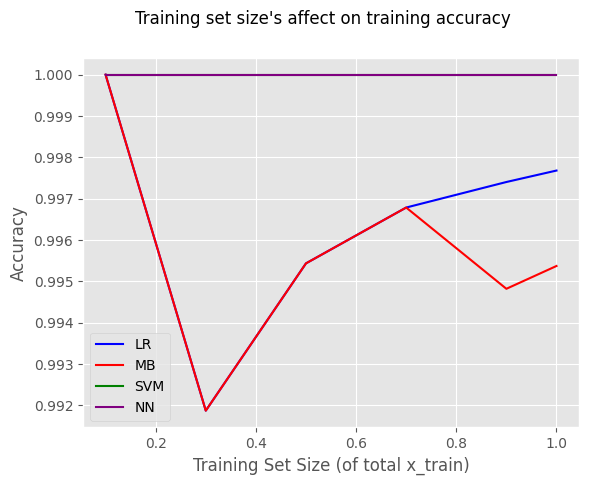

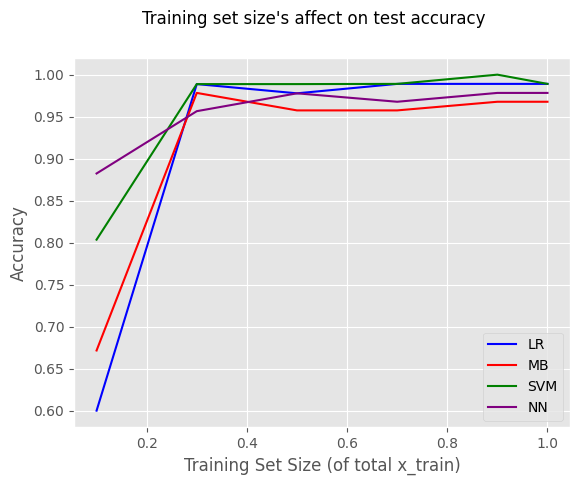

In [52]:
modifiers = [0.1,0.3,0.5,0.7,0.9,1.0]    

#Training Accuracy plot
plt.style.use('ggplot')
plt.suptitle("Training set size's affect on training accuracy")
plt.xlabel("Training Set Size (of total x_train)")
plt.ylabel("Accuracy")
plt.plot(modifiers, train_scores_lr, color = "blue", label = "LR")
plt.plot(modifiers, train_scores_MB, color = "red", label = "MB")
plt.plot(modifiers, train_scores_SVM, color = "green", label = "SVM")
plt.plot(modifiers, train_scores_NN, color = "purple", label = "NN")
plt.legend()
plt.show()

#Testing accuracy plot
plt.style.use('ggplot')
plt.suptitle("Training set size's affect on test accuracy")
plt.xlabel("Training Set Size (of total x_train)")
plt.ylabel("Accuracy")
plt.plot(modifiers, test_scores_lr, color = "blue", label = "LR")
plt.plot(modifiers, test_scores_MB, color = "red", label = "MB")
plt.plot(modifiers, test_scores_SVM, color = "green", label = "SVM")
plt.plot(modifiers, test_scores_NN, color = "purple", label = "NN")
plt.legend()
plt.show()

### Explaining General Trends of the Plots

There doesn't appear to be any real trend in the training accuracy as the training set size increases. For all of logistic regression, naive bayes and SVM the training accuracy is aporadic and changes as we increase the training set size with no noticeable pattern. However for neural network, the training accuracy is 1 for all training set sizes, showing that the size of the training set does not affect the training accuracy for this classifier.

For the testing accuracy, we can see that logistic regression, naive bayes and SVM start with lower testing accuracy and these then increase at a linear rate until we get to training size 0.3 where they level out. The test accuracy then remains constant with an accuracy close to 1 as the training size increases. Neural network once again behaves slightly differently, as even with the small training set size it has quite good accuracy of almost 0.9. It's accuracy also increases gradually until we get to the training size 0.5, where it also flattens out and stays slightly below 1 as the training set size increases. 

### 5-fold cross-validation testing

In [54]:
def crossVal(models):
    kf = KFold(n_splits=5)
    n = 1

    x_train = np.array(df_train.Text)
    y_train = np.array(df_train.Category)
    x_test = np.array(df_test.Text)
    y_test = np.array(df_test.Category)

    tf_idf = tf_idf_generator([[x_train, y_train, x_test, y_test]])
    run = tf_idf[0]
    x_train,y_train,x_test,y_test = run[0],run[1],run[2],run[3]
    
    for model in models:
        trainScores = []
        valScores = []
        print("Model {}:".format(n))
        for train_index, test_index in kf.split(x_train):
            model.fit(x_train[train_index], y_train[train_index])
            trainScores.append(model.score(x_train[train_index], y_train[train_index]))
            valScores.append(model.score(x_train[test_index], y_train[test_index]))
        model.fit(x_train,y_train)
        y_pred_test = model.predict(x_test)
        print("Average training accuracy = {}".format(sum(trainScores)/5))
        print("Average validation accuracy = {}".format(sum(valScores)/5))
        print("Testing accuracy = {}".format(f1_score(y_test,y_pred_test, pos_label="tech")))
        print()
        n += 1

def crossVal_testAccuracy(models): # takes list of models as input, produces F1 measures for accuracy scores
  n = 0 
  kf = KFold(n_splits=5)
  x_train = np.array(df_train.Text)
  y_train = np.array(df_train.Category)
  x_test = np.array(df_test.Text)
  y_test = np.array(df_test.Category)

  tf_idf = tf_idf_generator([[x_train, y_train, x_test, y_test]])
  run = tf_idf[0]
  x_train,y_train,x_test,y_test = run[0],run[1],run[2],run[3]

  for model in models:
    scoreTotal = 0
    n+=1
    for train_indices, test_indices in kf.split(x_train):
        model.fit(x_train[train_indices], y_train[train_indices])
        y_pred_test = model.predict(x_train[test_indices])
        scoreTotal += f1_score(y_train[test_indices],y_pred_test,pos_label="tech")
    model.fit(x_train,y_train)
    y_pred_test = model.predict(x_test)
    print("Average validation accuracy for model "+str(n)+" = " + str(scoreTotal/len(models))+", Test accuracy = "+ str(f1_score(y_test,y_pred_test,pos_label="tech")))

#### LR Cross-Validation

In [55]:
lr1 = LogisticRegression(penalty="l2", C=10)
lr2 = LogisticRegression(penalty="l2", C=1)
lr3 = LogisticRegression(penalty="l2", C=0.1)
lr4 = LogisticRegression(penalty="l2", C=0.01)
lr5 = LogisticRegression(penalty="l2", C=0.001)
lr6 = LogisticRegression(penalty="l2", C=0.0001)

models = [lr1, lr2, lr3, lr4, lr5, lr6]
crossVal(models)

Model 1:
Average training accuracy = 1.0
Average validation accuracy = 0.9836662106703147
Testing accuracy = 0.989010989010989

Model 2:
Average training accuracy = 0.9976642285987076
Average validation accuracy = 0.9813406292749658
Testing accuracy = 0.989010989010989

Model 3:
Average training accuracy = 0.9959115475764241
Average validation accuracy = 0.9720109439124487
Testing accuracy = 0.989010989010989

Model 4:
Average training accuracy = 0.6308696912348899
Average validation accuracy = 0.546703146374829
Testing accuracy = 0.8823529411764706

Model 5:
Average training accuracy = 0.5081769048471518
Average validation accuracy = 0.4813406292749658
Testing accuracy = 0.5960264900662252

Model 6:
Average training accuracy = 0.5081769048471518
Average validation accuracy = 0.4813406292749658
Testing accuracy = 0.5960264900662252



Decreasing the hyperparameter C causes a decrease in validation accuracy. This decrease is quite gradual from C values 10 to 0.1, but we then see quite a large decrease when we go to C=0.01, as the validation accuracy goes from 0.81 down to 0.47, when it then starts to decrease slowly once again.

The test accuracy is identical for the first three models (C values from 10 to 0.1). We then see the test accuracy drop by 0.1 when we decrease C to 0.01, and it then drops significantly more (by 0.3) when we reduce C to 0.001. The test accuracy remains identical with the C value 0.0001.


#### NB Cross-Validation

In [56]:
#Testing additive Laplace smoothing parameter
alphas = [0.00001,0.001,0.1,0.5,1]
md_models = [MultinomialNB(alpha = x) for x in alphas]
crossVal(md_models)

Model 1:
Average training accuracy = 1.0
Average validation accuracy = 0.9696853625170998
Testing accuracy = 0.989010989010989

Model 2:
Average training accuracy = 1.0
Average validation accuracy = 0.9766621067031463
Testing accuracy = 0.989010989010989

Model 3:
Average training accuracy = 0.9964946379554329
Average validation accuracy = 0.9836388508891929
Testing accuracy = 0.967741935483871

Model 4:
Average training accuracy = 0.9953267522547866
Average validation accuracy = 0.9766621067031463
Testing accuracy = 0.967741935483871

Model 5:
Average training accuracy = 0.9953267522547866
Average validation accuracy = 0.9789876880984952
Testing accuracy = 0.967741935483871



For Multinomail Naive Bayes the hyper parameter used for the 5-fold cross vaildation was the additive Laplace smoothing parameter α. We observed that as 	α increased the training accuracy and the testing accuracy decreases. While the Average validation accuracy rises peaking at α = 0.1 then begins to decrease.

The two models considered for having the best hyper parameters were model 2 & 3.  nModel 2 with an α = 0.001 was selected as the best model with the value of it's increased testing accuracy off-setting it's slightly lower validation accuracy.

#### SVM Cross-Validation

In [57]:
svm1 = SVC(kernel='rbf', gamma=1, C=0.1)
svm2 = SVC(kernel='rbf', gamma=5, C=0.1)
svm3 = SVC(kernel='rbf', gamma=1, C=0.5)
svm4 = SVC(kernel='rbf', gamma=5, C=0.5)
svm5 = SVC(kernel='rbf', gamma=1, C=1E10)
svm6 = SVC(kernel='rbf', gamma=5, C=1E10)

models = [svm1, svm2, svm3, svm4, svm5, svm6]
crossVal(models)

Model 1:
Average training accuracy = 0.5081769048471518
Average validation accuracy = 0.4813406292749658
Testing accuracy = 0.5960264900662252

Model 2:
Average training accuracy = 0.5081769048471518
Average validation accuracy = 0.4813406292749658
Testing accuracy = 0.5960264900662252

Model 3:
Average training accuracy = 0.9982473189777163
Average validation accuracy = 0.9766894664842681
Testing accuracy = 1.0

Model 4:
Average training accuracy = 1.0
Average validation accuracy = 0.5350205198358412
Testing accuracy = 0.6206896551724138

Model 5:
Average training accuracy = 1.0
Average validation accuracy = 0.9813406292749658
Testing accuracy = 0.989010989010989

Model 6:
Average training accuracy = 1.0
Average validation accuracy = 0.6167989056087552
Testing accuracy = 0.4482758620689655



For SVM, the two hyperparameters used are the kernel width $\sigma$ and the misclassification penalty C.

By evaluating the training and validation accuracies, Model 5 ($\sigma$ = 1, C = 1E10) appears to perform the best as it has the highest average training and validation accuracy across all models assessed.

Changing $\sigma$ tends to affect the testing accuracy, that is the higher $\sigma$ is, the lower the testing accuracy. $\sigma$ appears to not affect training accuracy but there are noticeable differences in testing accuracy based on $\sigma$ and this is likely the result of overfitting as the higher $\sigma$ is, the more points are used to define the hyperplane. 

Changing C tends to affect the training accuracy, that is the higher C is, the higher the training accuracy. This appears to be offset by the lower testing accuracy as a higher C tends to result in overfitting. Having a lower C will also result in a lower training accuracy which will result in underfitting so the optimal C to choose will have to be somewhere in the middle with the right balance of misclassification tolerance allowed by the model.

#### NN Cross-Validation

In [59]:
# Selected hyperparameters to examine: max iterations and learning rate

# vary from 40, 100, 150 units in hidden layer, and 0.1, 0.01 learning rate

NNcv1 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, learning_rate_init=0.01)
NNcv2 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, learning_rate_init=0.01)
NNcv3 = MLPClassifier(hidden_layer_sizes=(150), max_iter=1000, learning_rate_init=0.01)
NNcv4 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, learning_rate_init=0.1)
NNcv5 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, learning_rate_init=0.1)
NNcv6 = MLPClassifier(hidden_layer_sizes=(150), max_iter=1000, learning_rate_init=0.1)

models = [NNcv1, NNcv2, NNcv3, NNcv4, NNcv5, NNcv6]

crossVal(models)

Model 1:
Average training accuracy = 1.0
Average validation accuracy = 0.9836388508891929
Testing accuracy = 1.0

Model 2:
Average training accuracy = 1.0
Average validation accuracy = 0.9836662106703147
Testing accuracy = 0.989010989010989

Model 3:
Average training accuracy = 1.0
Average validation accuracy = 0.9859917920656635
Testing accuracy = 1.0

Model 4:
Average training accuracy = 1.0
Average validation accuracy = 0.9392612859097127
Testing accuracy = 0.967741935483871

Model 5:
Average training accuracy = 1.0
Average validation accuracy = 0.9789603283173735
Testing accuracy = 0.9782608695652174

Model 6:
Average training accuracy = 1.0
Average validation accuracy = 0.9743365253077976
Testing accuracy = 0.989010989010989



Changing the unit count (through the values 40, 100, and 150) for the hidden layer appears to have only a slight positive effect on both validation and test accuracy respectively. After changing learning rate (from 0.01 to 0,1) both accuracies experience a slight, but noticable, drop. At this training rate, the differences between hidden unit counts become more exaggerated, and it can be seen that 150 hidden layers produces significantly better results than 40 and 100 (with a trend of increase in test accuracy as hidden unit count increases).

As such, the best model to use should have learning rate = 0.01, and will function best with hidden_layer_sizes = 150 (model 3).

### Final Summary
After some investigation, we found the best models from above to be model 1 for logistic regression, model 2 for naive bayes and model 3 for both SVM and neural network. The choice for each best model was made by choosing the models that maximised the testing accuracy, and if there were multiple with the same test accuracy then we used the average validation accuracy as a tie breaker.

All four of these models had quite good accuracy, but the neural network is the superior model with its testing and training accuracy values of 1.0, alongside the high training accuracy value (0.99).

We therefore summarise that the best supervised learning algorithm for article classification on BBC news datasets is a neural network with learning rate of 0.01 and a hidden layer unit count of 150.